In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [2]:
bears_csvs = os.listdir('Bears_CSVs')
bears_dfs = [pd.read_csv('Bears_CSVs/'+csv) for csv in bears_csvs]
for df in bears_dfs:
    df['Date'] = pd.to_datetime(df['Date'])

In [3]:
len(bears_dfs[0])

,Unnamed: 0,ID,Date,User,Tweet,HashTags,Likes,Retweets,MentionUsers,LocationCoordinates,clean_Tweet,NLTK_Sentiment_Analysis,TextBlob_Sentiment_Analysis,Compound_Sentiment_Score,Positive_Sentiment
0,1,1592668463293779968,2022-11-15 23:58:46+00:00,chicagosportshq,ICYMI: #Bears running back placed on injured r...,['Bears'],0,0,NaN,NaN,icymi running back placed injured reserve,-0.4019,0.0,-0.4019,False
1,2,1592668462786269186,2022-11-15 23:58:46+00:00,dabearshq,ICYMI: #Bears running back placed on injured r...,['Bears'],0,0,NaN,NaN,icymi running back placed injured reserve,-0.4019,0.0,-0.4019,False
2,3,1592667246463094785,2022-11-15 23:53:56+00:00,VOODOOx07,If the #Bears could add \r\nOlumuyiwa Fashanu ...,['Bears'],1,0,NaN,NaN,could add olumuyiwa fashanu andrew vorhees ol ...,0.5719,0.8,1.3719,True
3,4,1592667010156175360,2022-11-15 23:53:00+00:00,bears_insider,Can the #Bears offense fix its fourth-quarter ...,['Bears'],4,0,NaN,NaN,offense fix fourth quarter woes,-0.5994,0.0,-0.5994,False
4,5,1592666760162856960,2022-11-15 23:52:00+00:00,BearsViews,UNC football hopes to ride momentum from NAU w...,"['Bears', 'ChicagoBears', 'BearsNation', 'DaBe...",0,0,NaN,NaN,unc football hopes ride momentum nau win final...,0.7650,0.4,1.1650,True


In [4]:
b_game_1 = bears_dfs[0]

In [5]:
def remove_users_from_df(df, list_users):
    indxs = df[df['User'].isin(list_users)].index
    dfc = df.drop(indxs, inplace=False)
    return dfc

users = b_game_1.groupby(['User']).size().sort_values(ascending=False).head(5)
print(users)
l = list(users.index.values) 
b_game_1_c = remove_users_from_df(b_game_1,l)
b_game_1_c.groupby(['User']).size().sort_values(ascending=False).head(5)

User
BearsViews        289
usaydkoshul        64
jacobinfante24     61
AaronLemingNFL     54
ErikLambert1       49
dtype: int64


User
670TheScore       43
classwarrior51    39
BearsNationCHI    35
bluegrasskings    34
Jake_B30          34
dtype: int64

In [6]:
bears_dfs[0].columns

Index(['Unnamed: 0', 'ID', 'Date', 'User', 'Tweet', 'HashTags', 'Likes',
       'Retweets', 'MentionUsers', 'LocationCoordinates', 'clean_Tweet',
       'NLTK_Sentiment_Analysis', 'TextBlob_Sentiment_Analysis',
       'Compound_Sentiment_Score', 'Positive_Sentiment'],
      dtype='object')

In [7]:
def make_scatter_and_pie_figure(df,fig_name,save=False):
    fig, axes = plt.subplots(2, 1, figsize=(15, 10))
    sns.set_style('whitegrid')
    sns.scatterplot(ax=axes[0],x=df['Date'],y=df["Compound_Sentiment_Score"],hue=df['Positive_Sentiment'])
    axes[0].set_title('Positive and Negative Sentiment Scores over Time Scatter Plot',fontsize=12)
    true = len(df.loc[(df['Positive_Sentiment']==True)])
    false = len(df.loc[(df['Positive_Sentiment']==False)])
    axes[1].pie([false,true],labels=["Negative",'Positive'])
    axes[1].set_title('Pie Plot of Sentiment Labels',fontsize=12)
    fig.suptitle(fig_name, fontsize=20)
    if save:
        plt.savefig(fig_name)

In [8]:
bears_csvs

['Bears_Game10_Lions.csv',
 'Bears_Game11_Falcons.csv',
 'Bears_Game9_Dolphins.csv',
 'Bears_Game5_Vikings.csv',
 'Bears_Game7_Patriots.csv',
 'Bears_Game4_Giants.csv',
 'Bears_Game2_Packers.csv',
 'Bears_Pre_Game1_Chiefs.csv',
 'Bears_Game8_Cowboys.csv',
 'Bears_Game3_Texans.csv',
 'Bears_Pre_Game2_Seahawks.csv',
 'Bears_Pre_Game3_Browns.csv',
 'Bears_Game1_Niners.csv',
 'Bears_Game6_Commanders.csv']

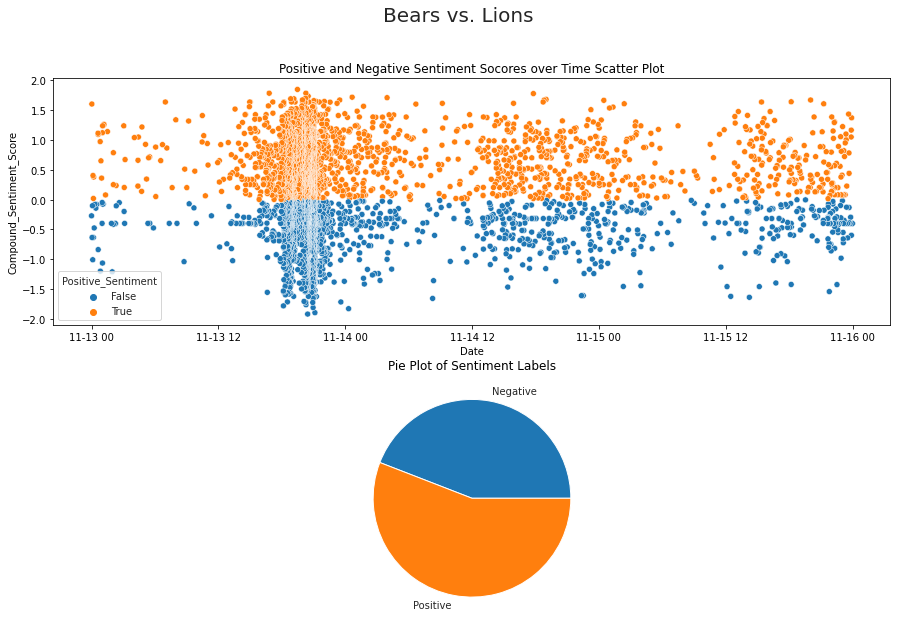

In [9]:
make_scatter_and_pie_figure(bears_dfs[0], 'Bears vs. Lions')

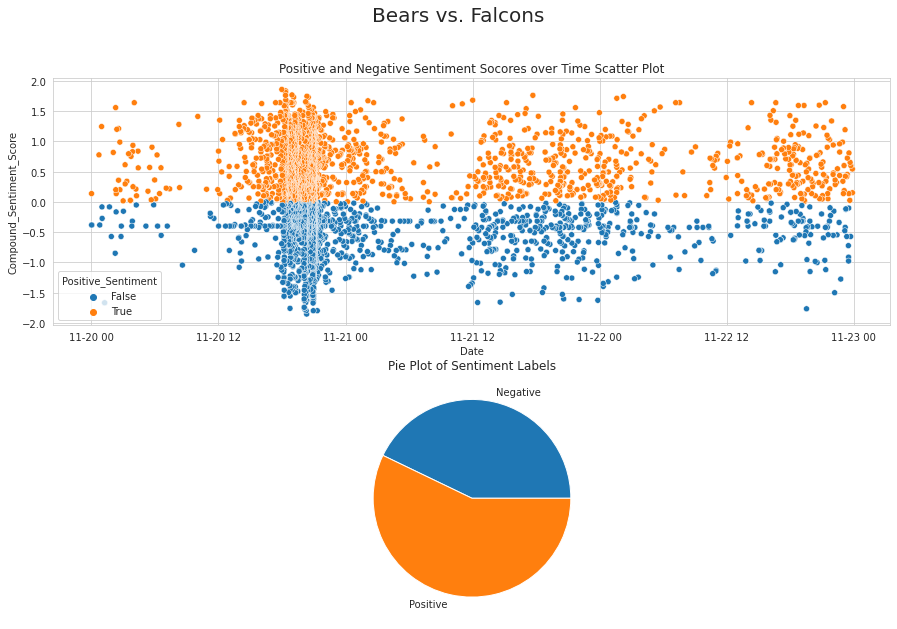

In [10]:
make_scatter_and_pie_figure(bears_dfs[1], 'Bears vs. Falcons')

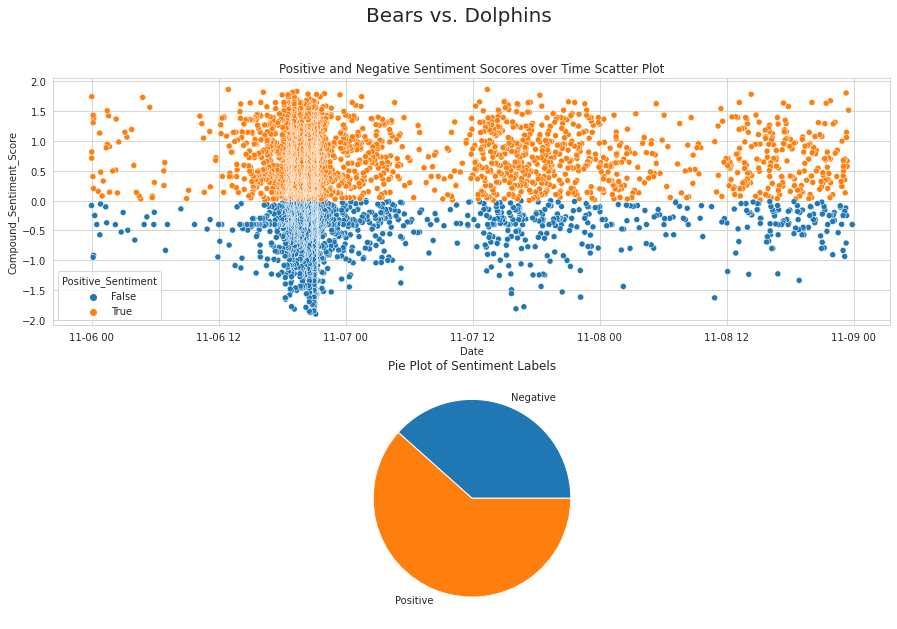

In [11]:
make_scatter_and_pie_figure(bears_dfs[2], 'Bears vs. Dolphins')

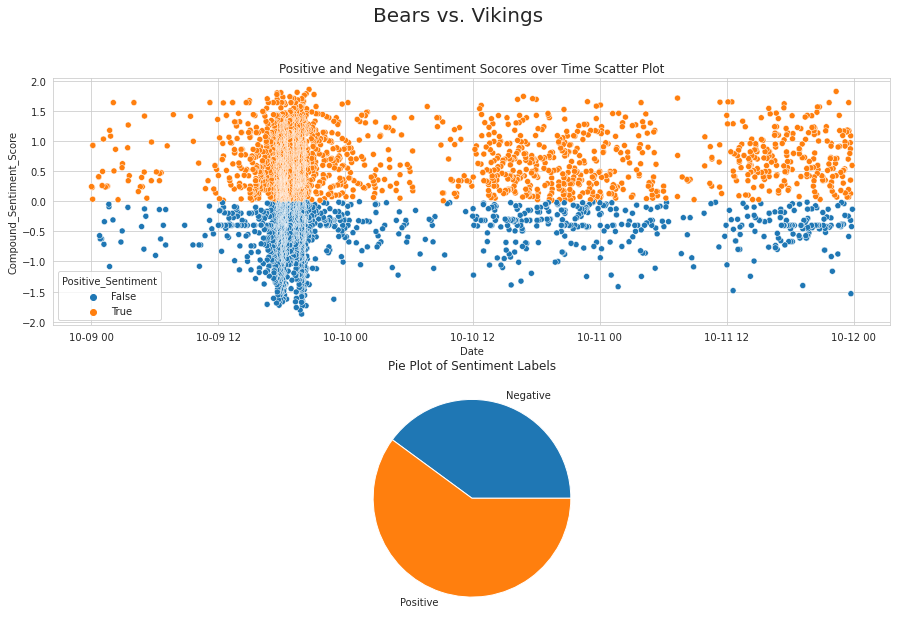

In [12]:
make_scatter_and_pie_figure(bears_dfs[3], 'Bears vs. Vikings')

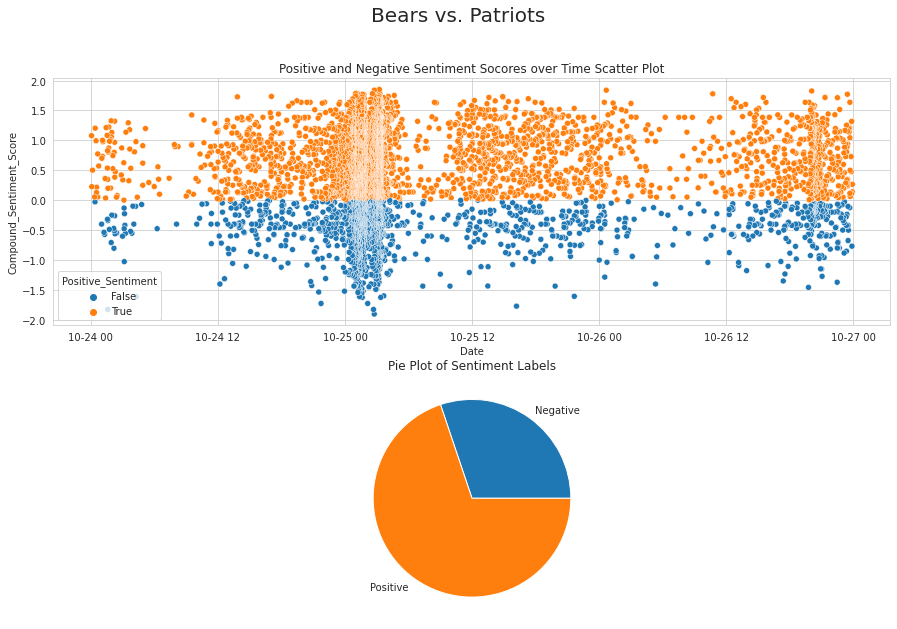

In [13]:
make_scatter_and_pie_figure(bears_dfs[4], 'Bears vs. Patriots')

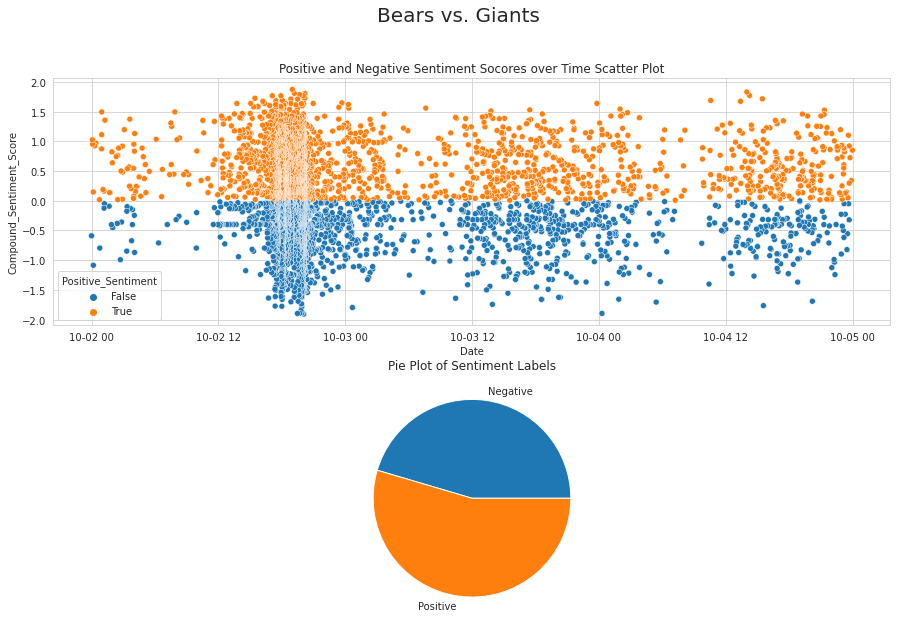

In [14]:
make_scatter_and_pie_figure(bears_dfs[5], 'Bears vs. Giants')

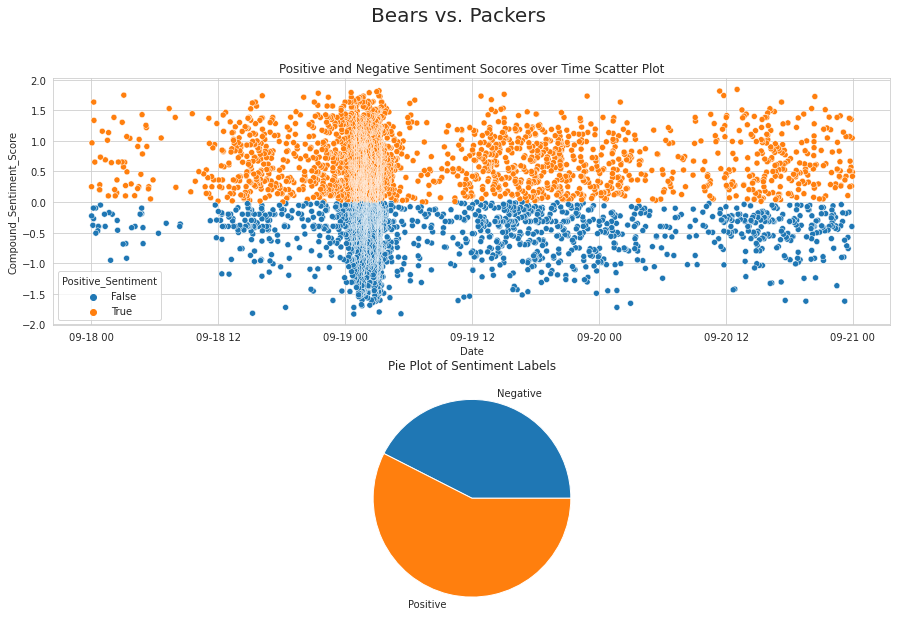

In [15]:
make_scatter_and_pie_figure(bears_dfs[6], 'Bears vs. Packers')

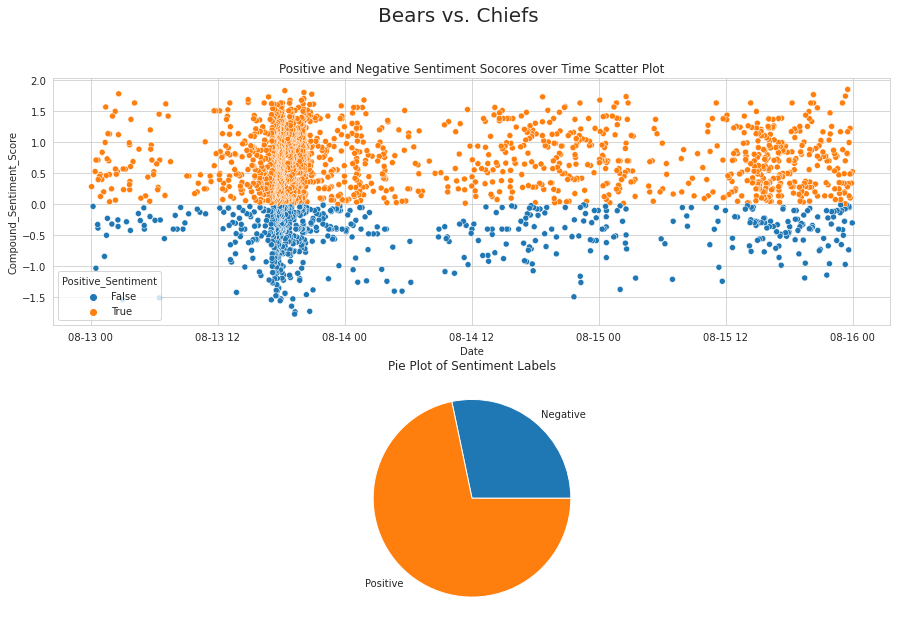

In [16]:
make_scatter_and_pie_figure(bears_dfs[7], 'Bears vs. Chiefs')

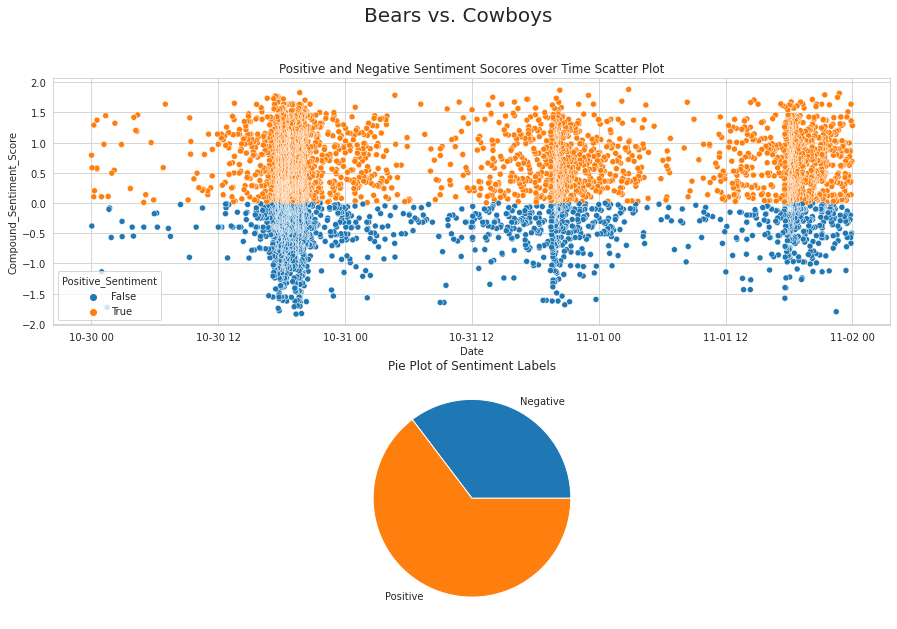

In [17]:
make_scatter_and_pie_figure(bears_dfs[8], 'Bears vs. Cowboys')

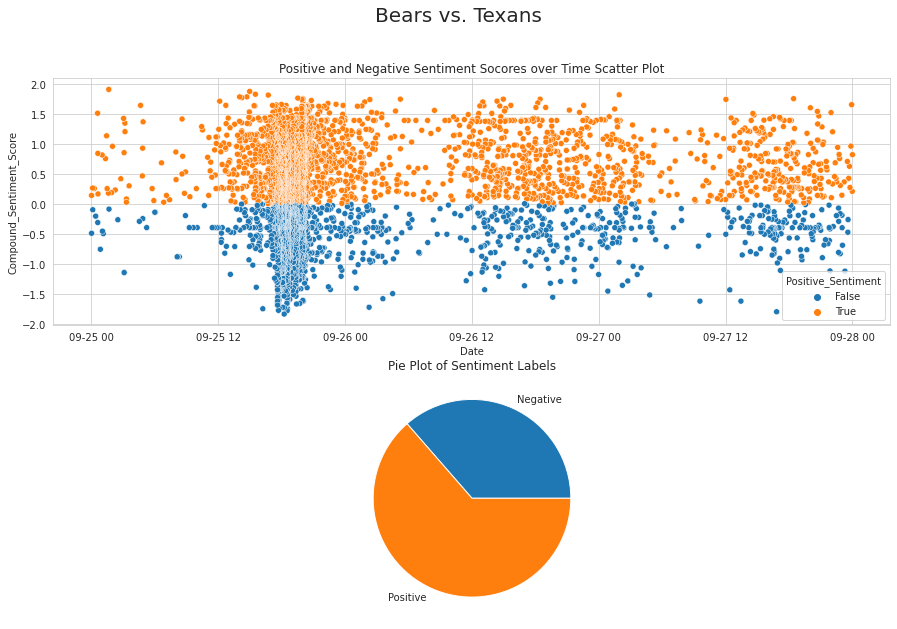

In [18]:
make_scatter_and_pie_figure(bears_dfs[9], 'Bears vs. Texans')

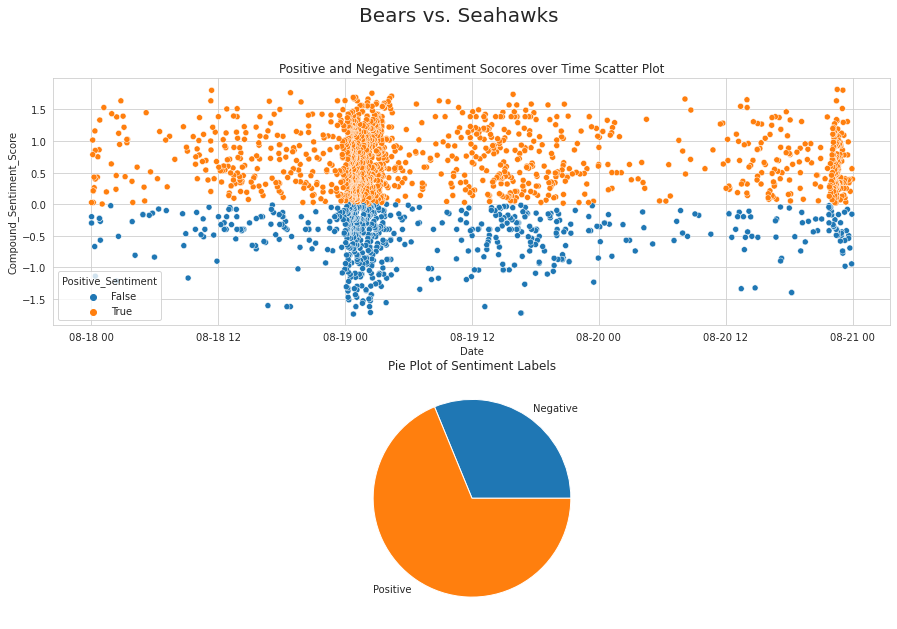

In [19]:
make_scatter_and_pie_figure(bears_dfs[10], 'Bears vs. Seahawks')

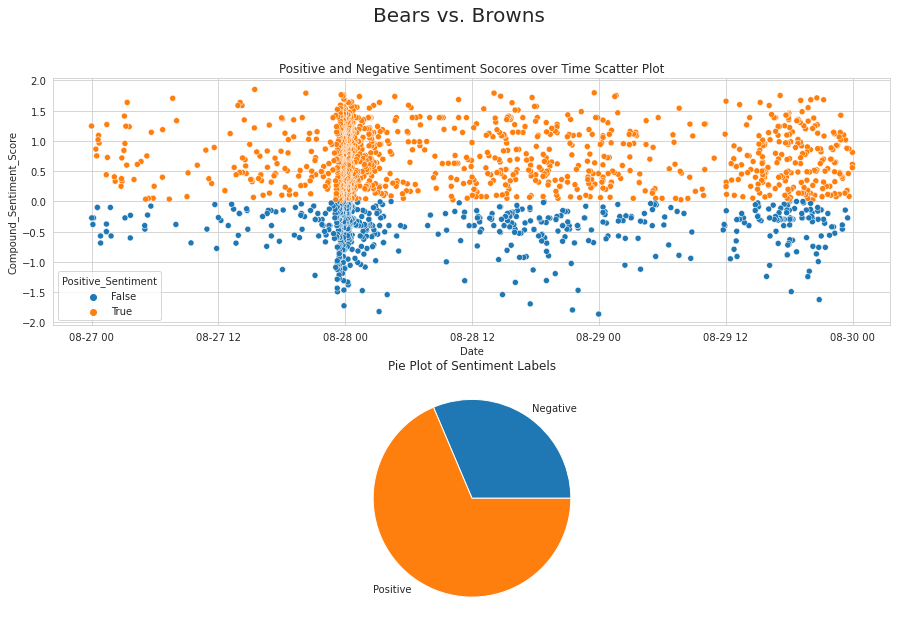

In [20]:
make_scatter_and_pie_figure(bears_dfs[11], 'Bears vs. Browns')

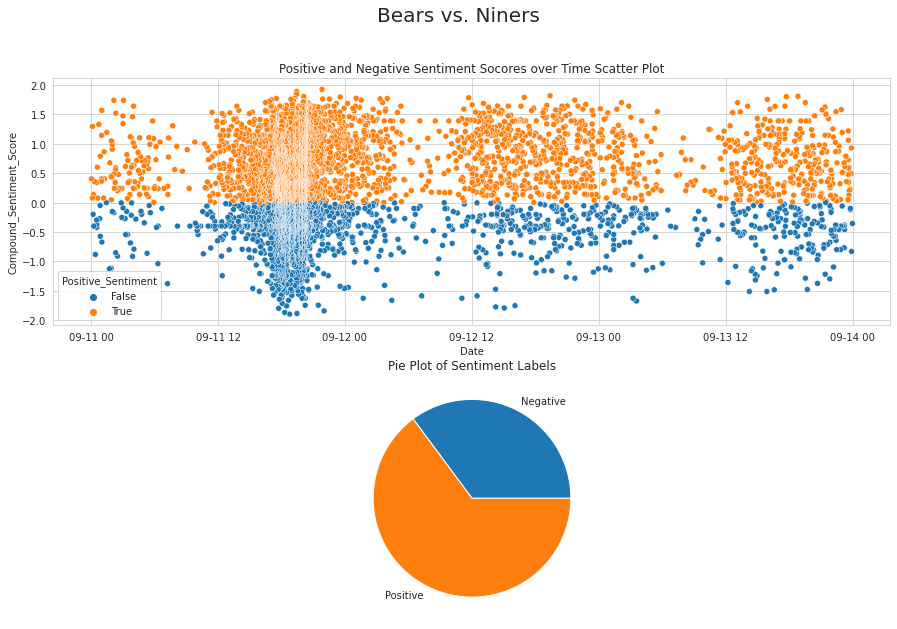

In [21]:
make_scatter_and_pie_figure(bears_dfs[12], 'Bears vs. Niners')

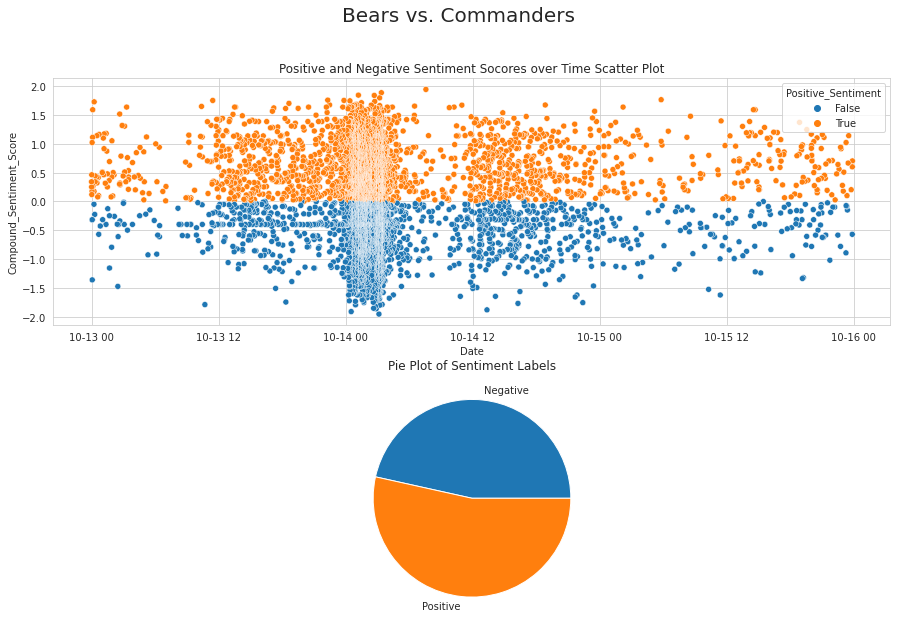

In [22]:
make_scatter_and_pie_figure(bears_dfs[13], 'Bears vs. Commanders')